# Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA 
and do necessary transformations and select the best model
using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Renaming Columns

In [3]:
data=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#   EDA

In [4]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#  to check unique values

In [6]:
data['delivery_time'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [7]:
data['sorting_time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5], dtype=int64)

#      to check Duplicate records  

In [8]:
data.duplicated().sum()

0

#     to check missing values

In [9]:
data.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

<Axes: >

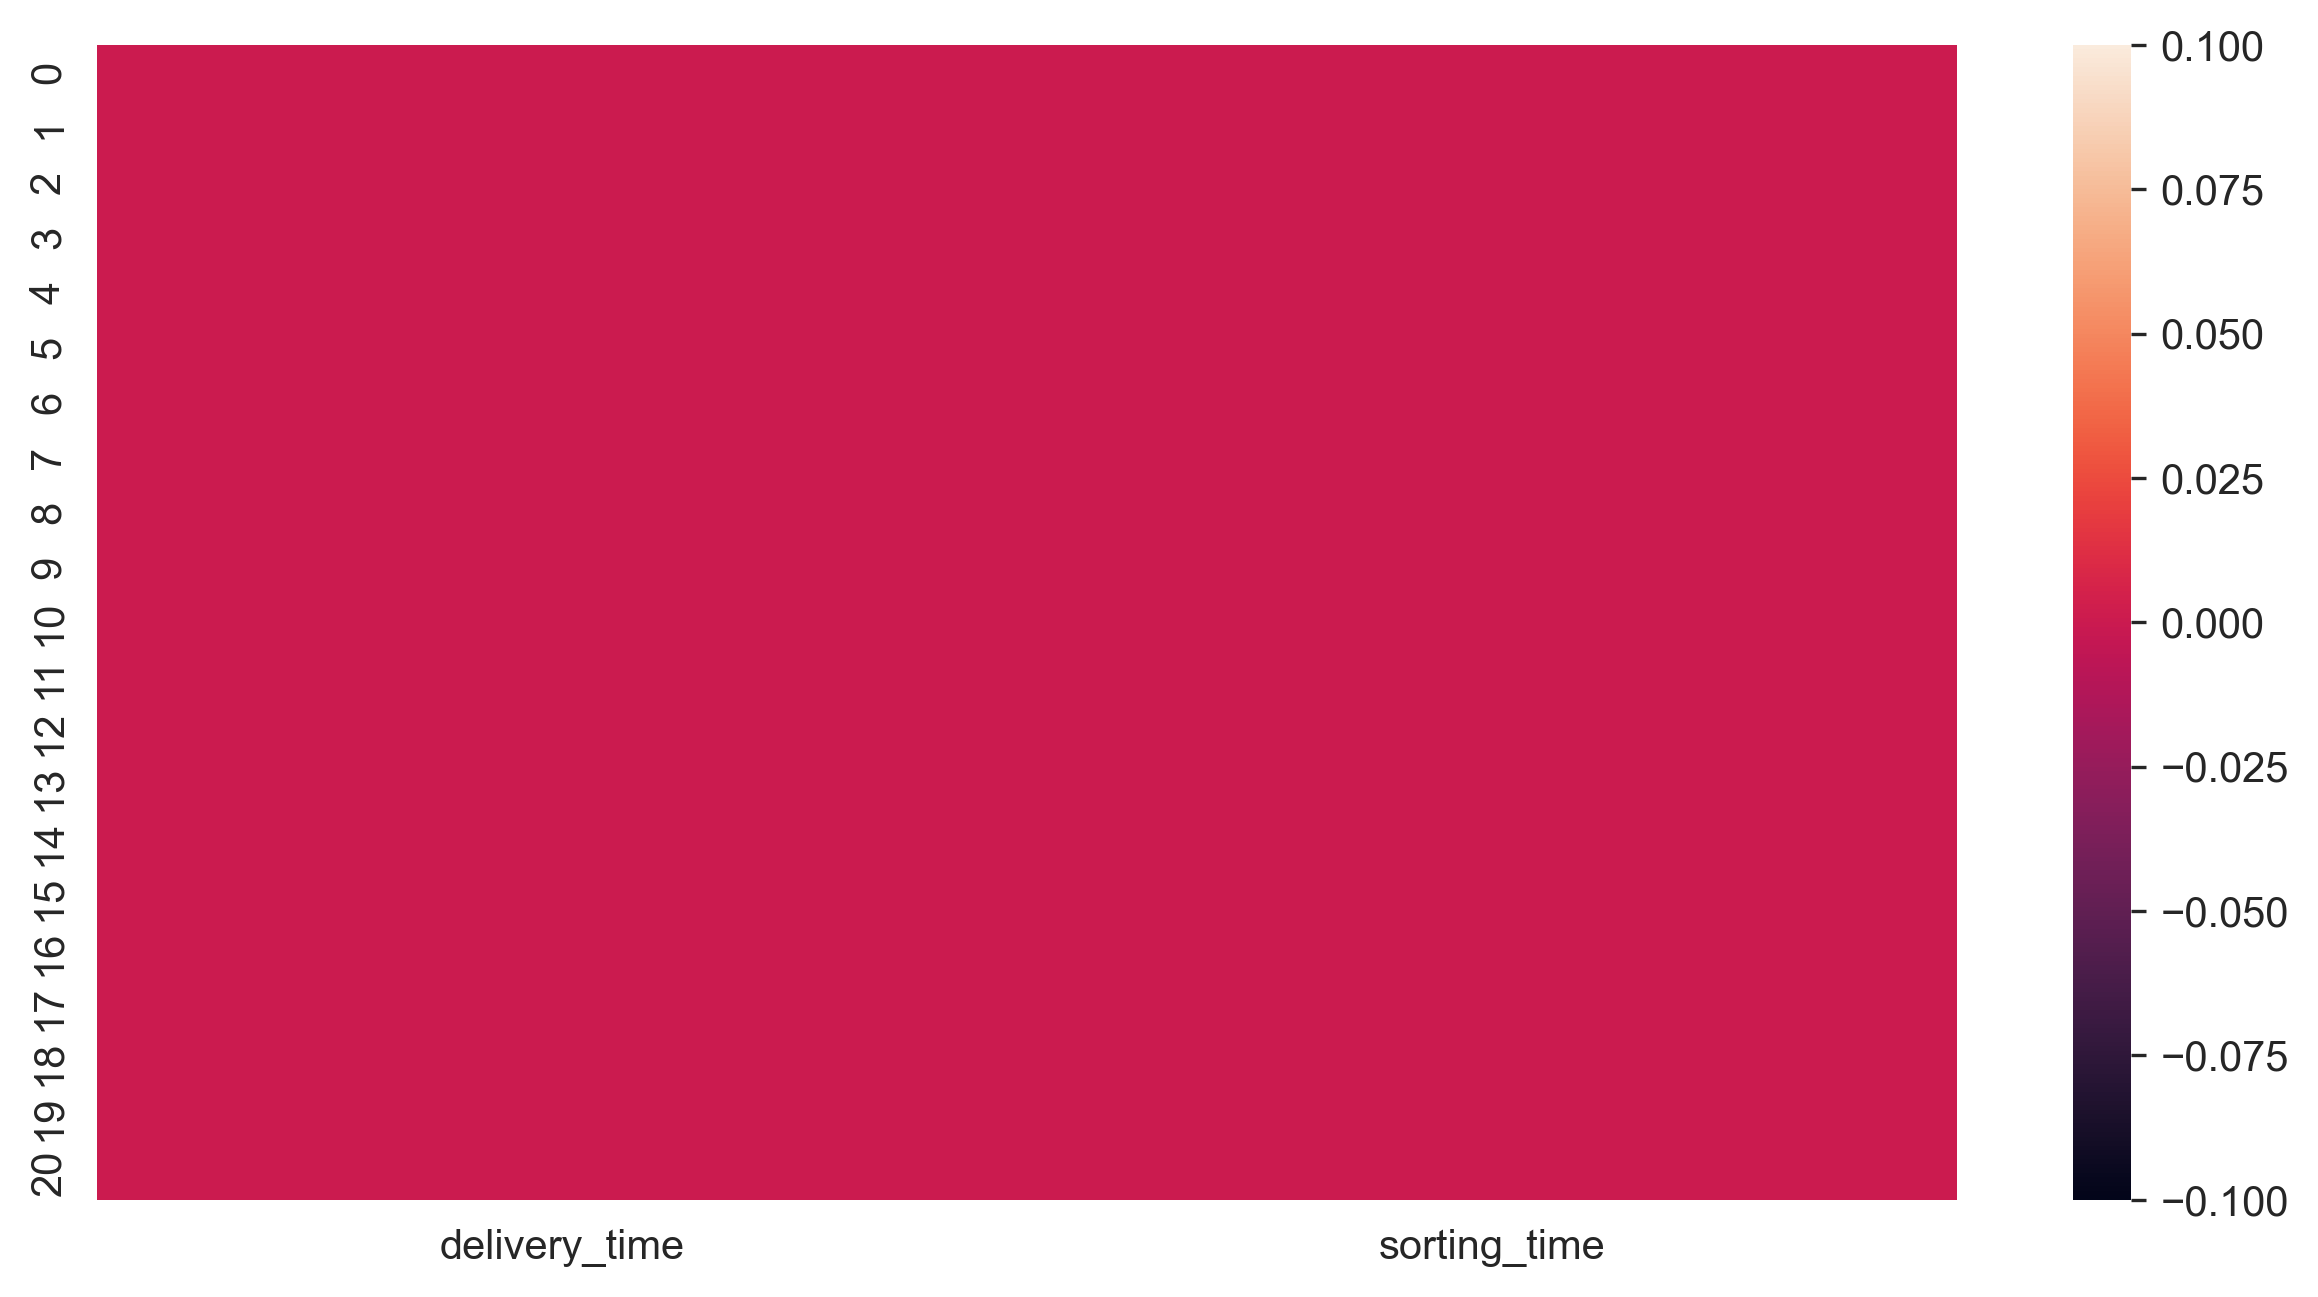

In [10]:
sns.heatmap(data.isna())

#    Otlier Dection

<Axes: >

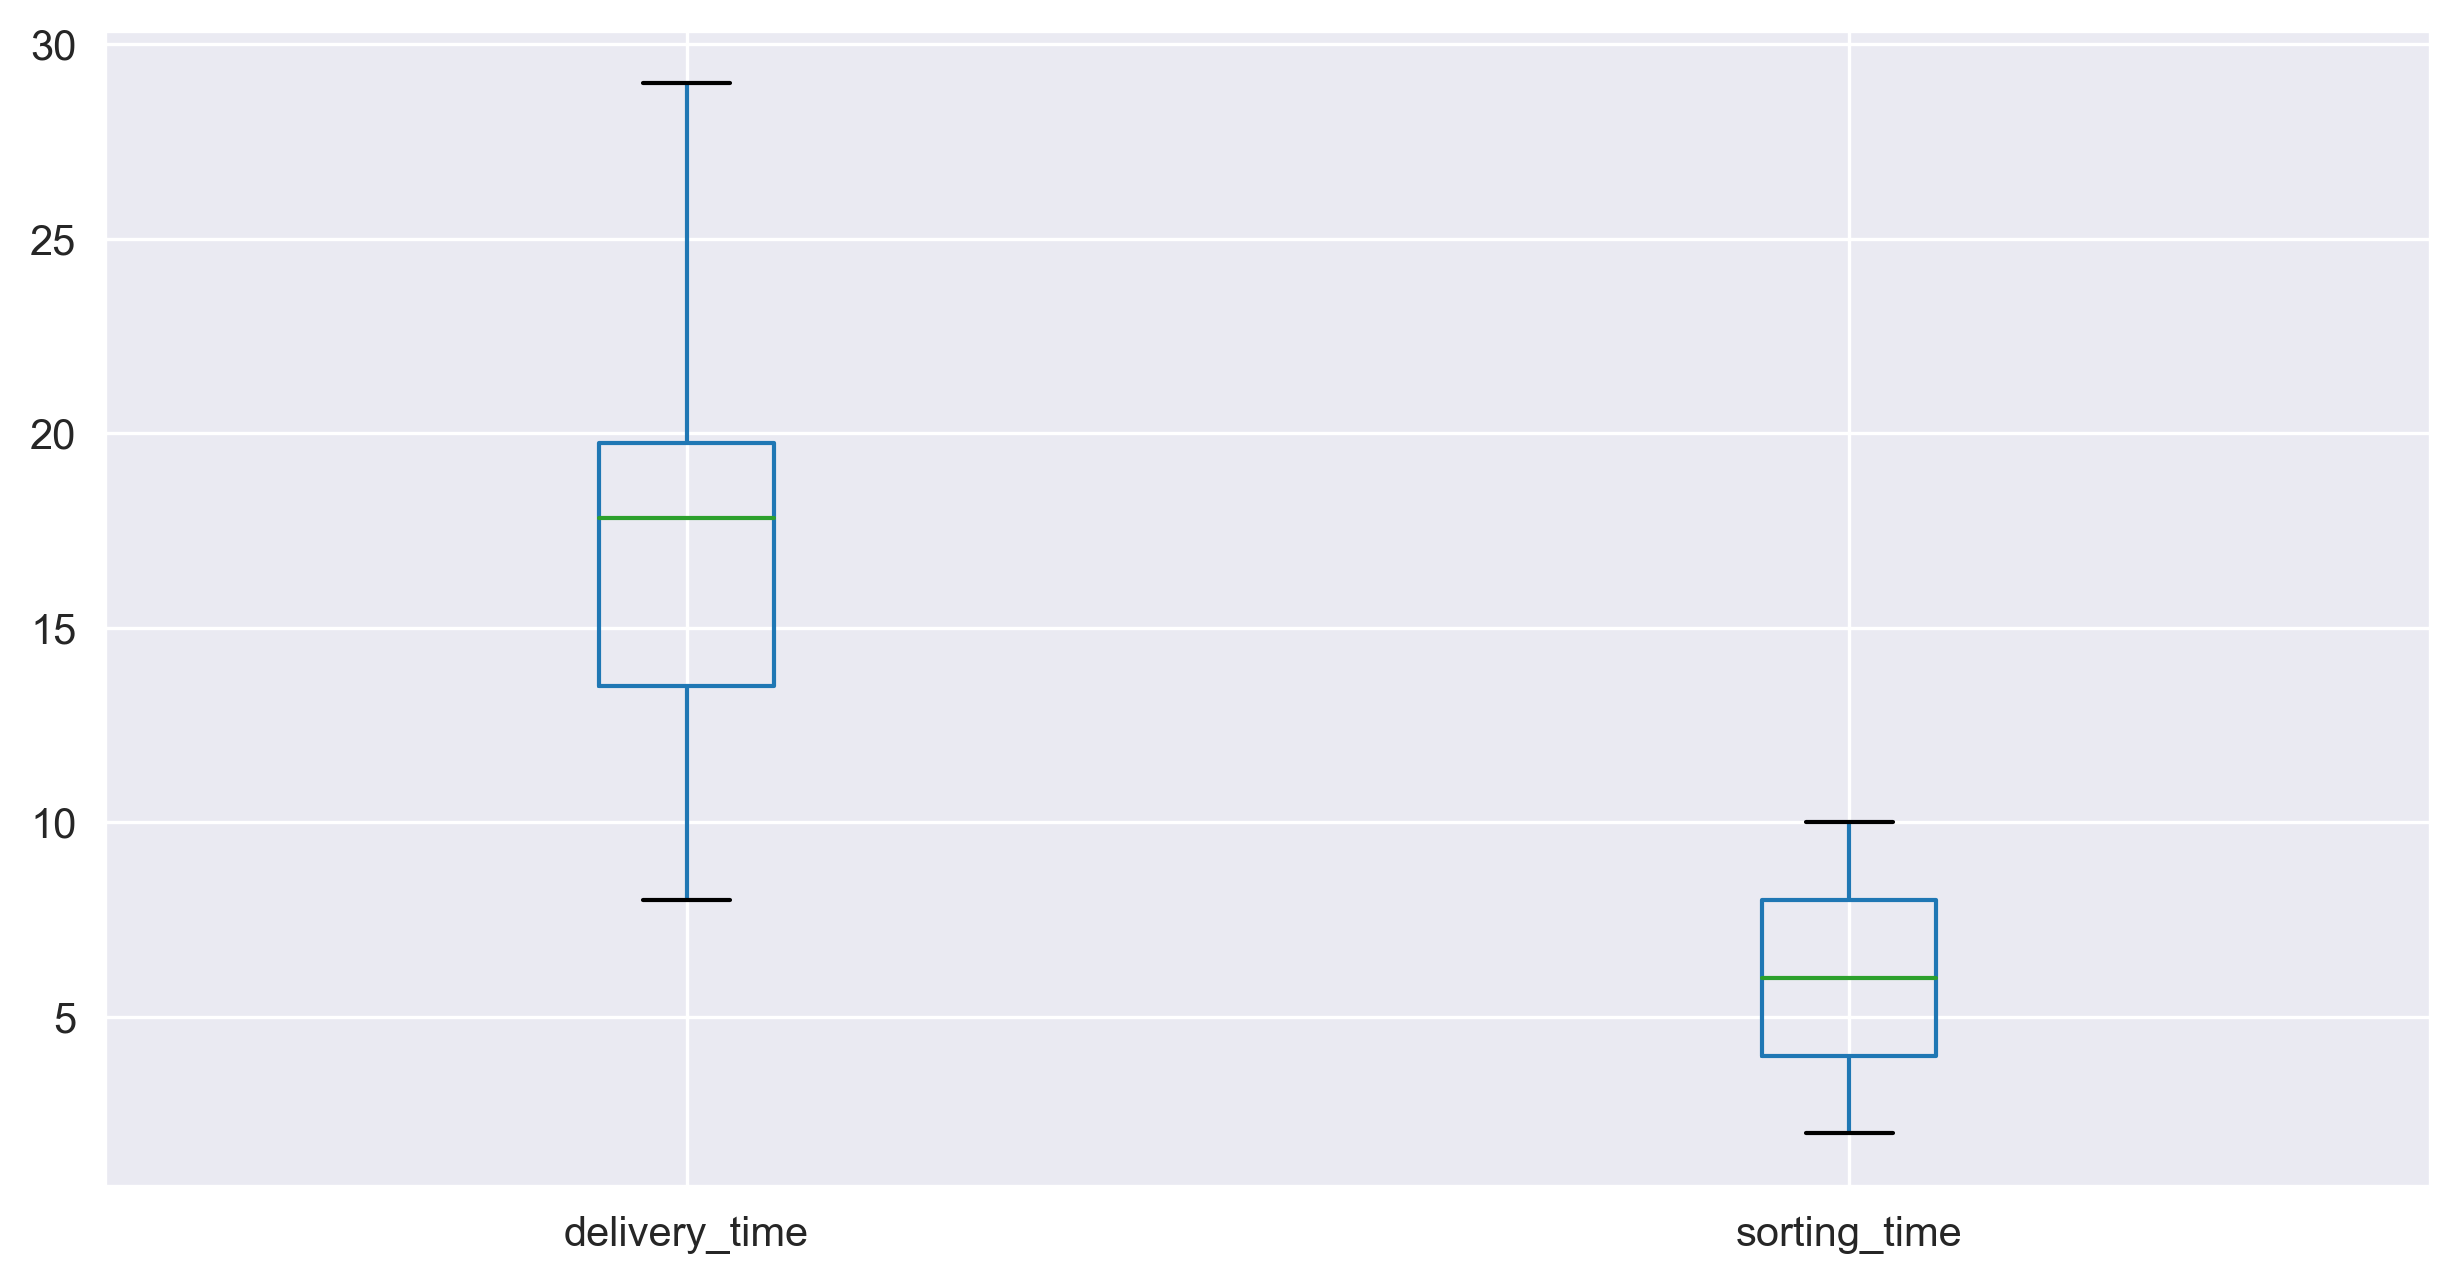

In [11]:
data.boxplot()

#      Scatter Plot and correlation

In [12]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

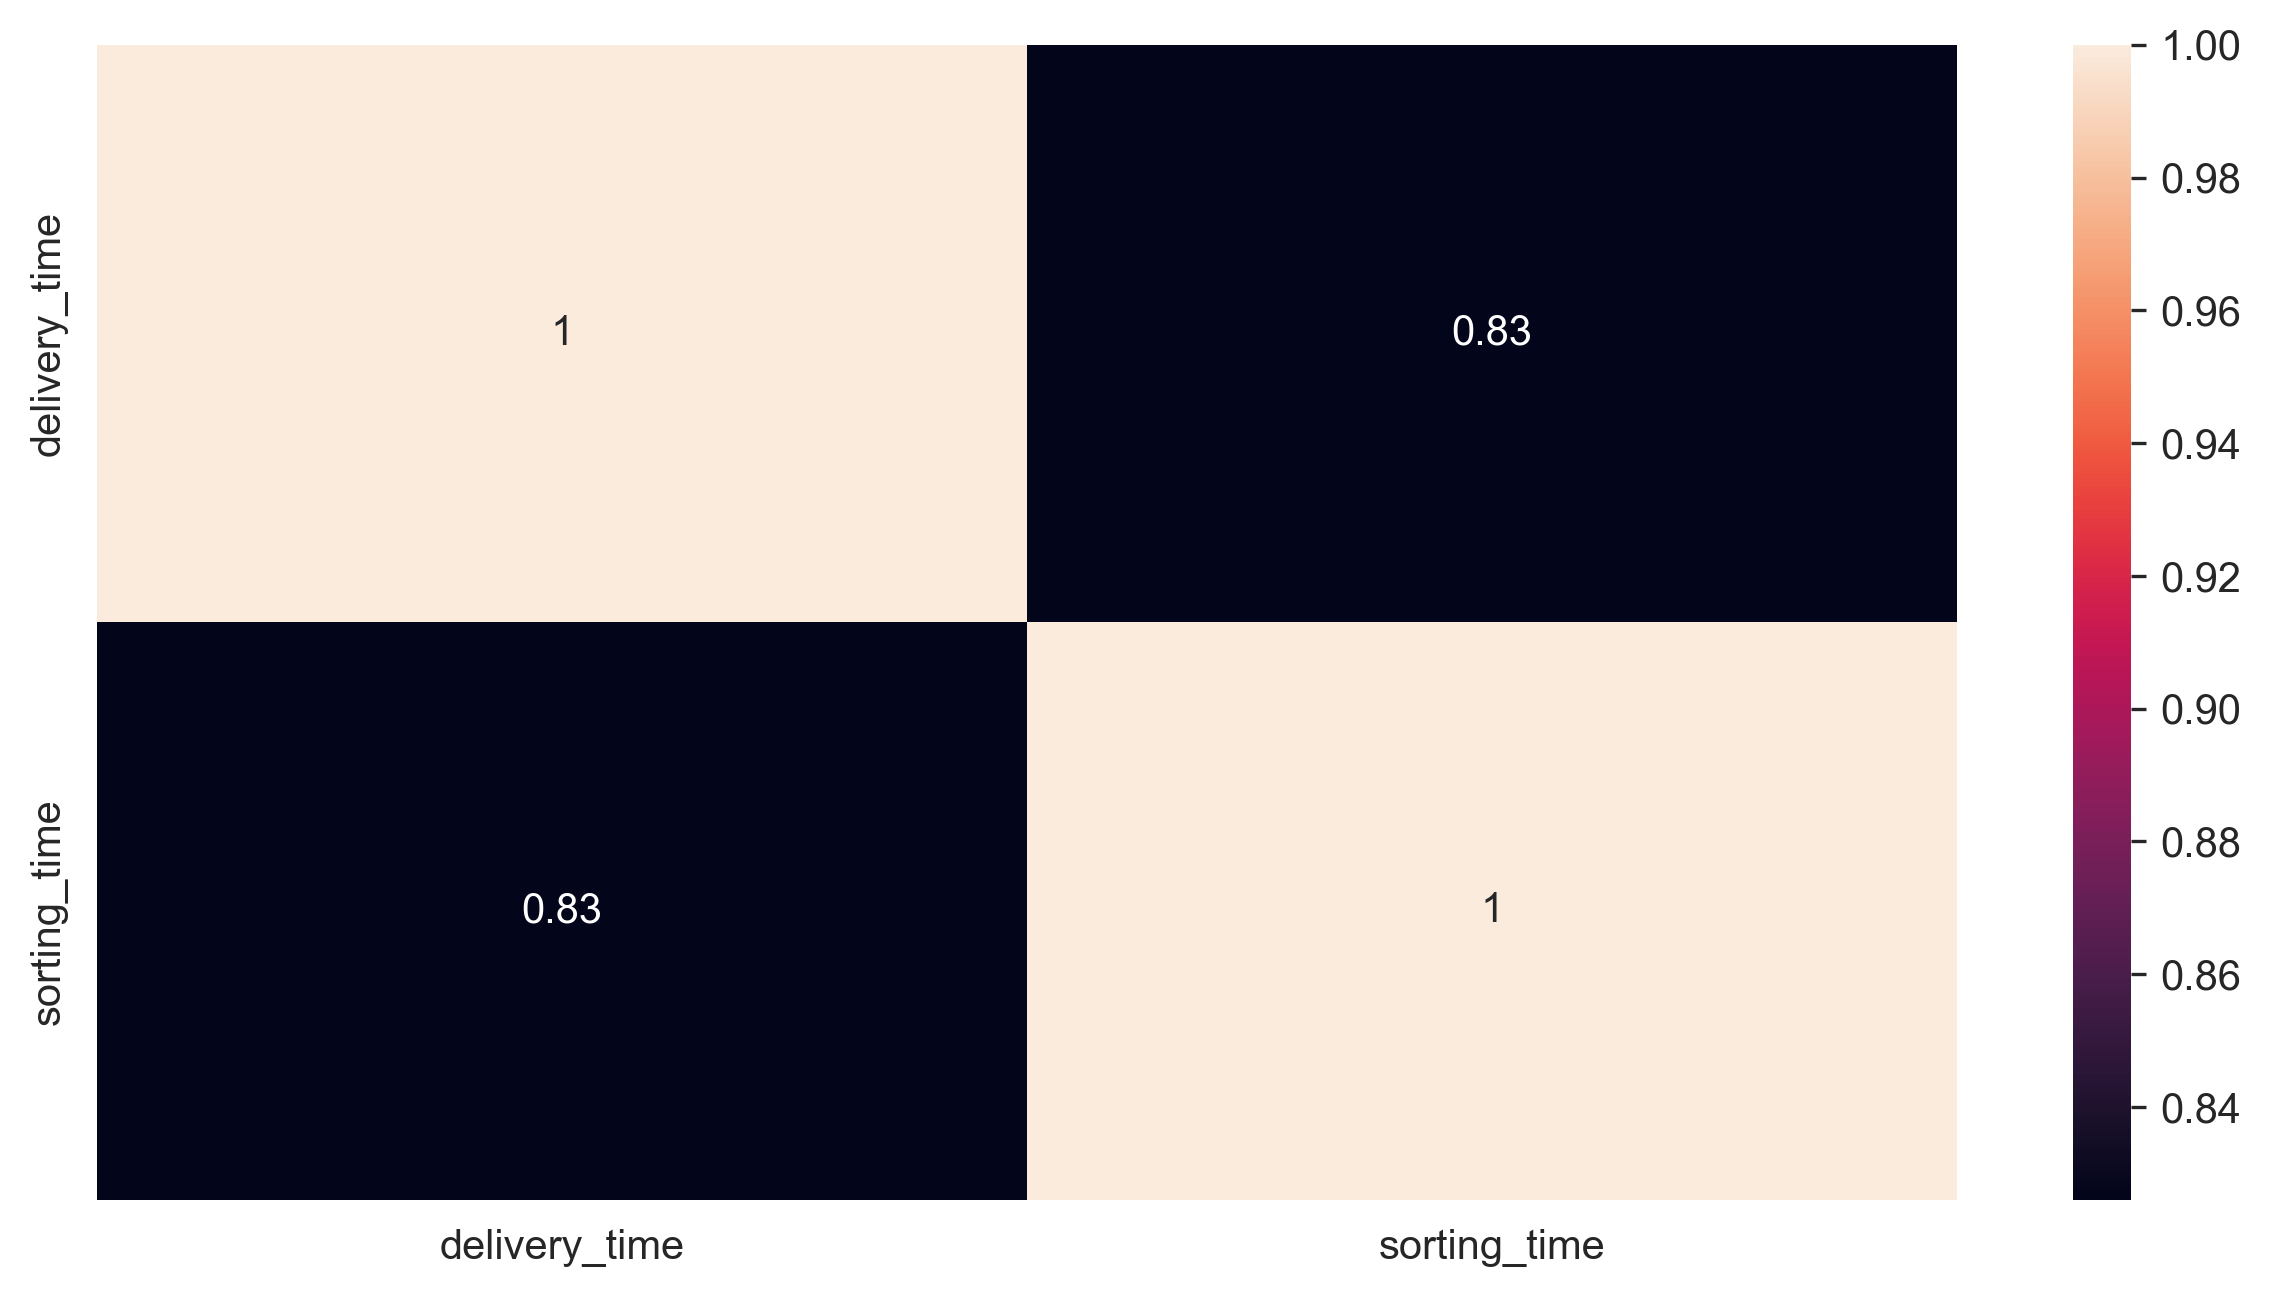

In [13]:
sns.heatmap(data.corr(),annot=True)

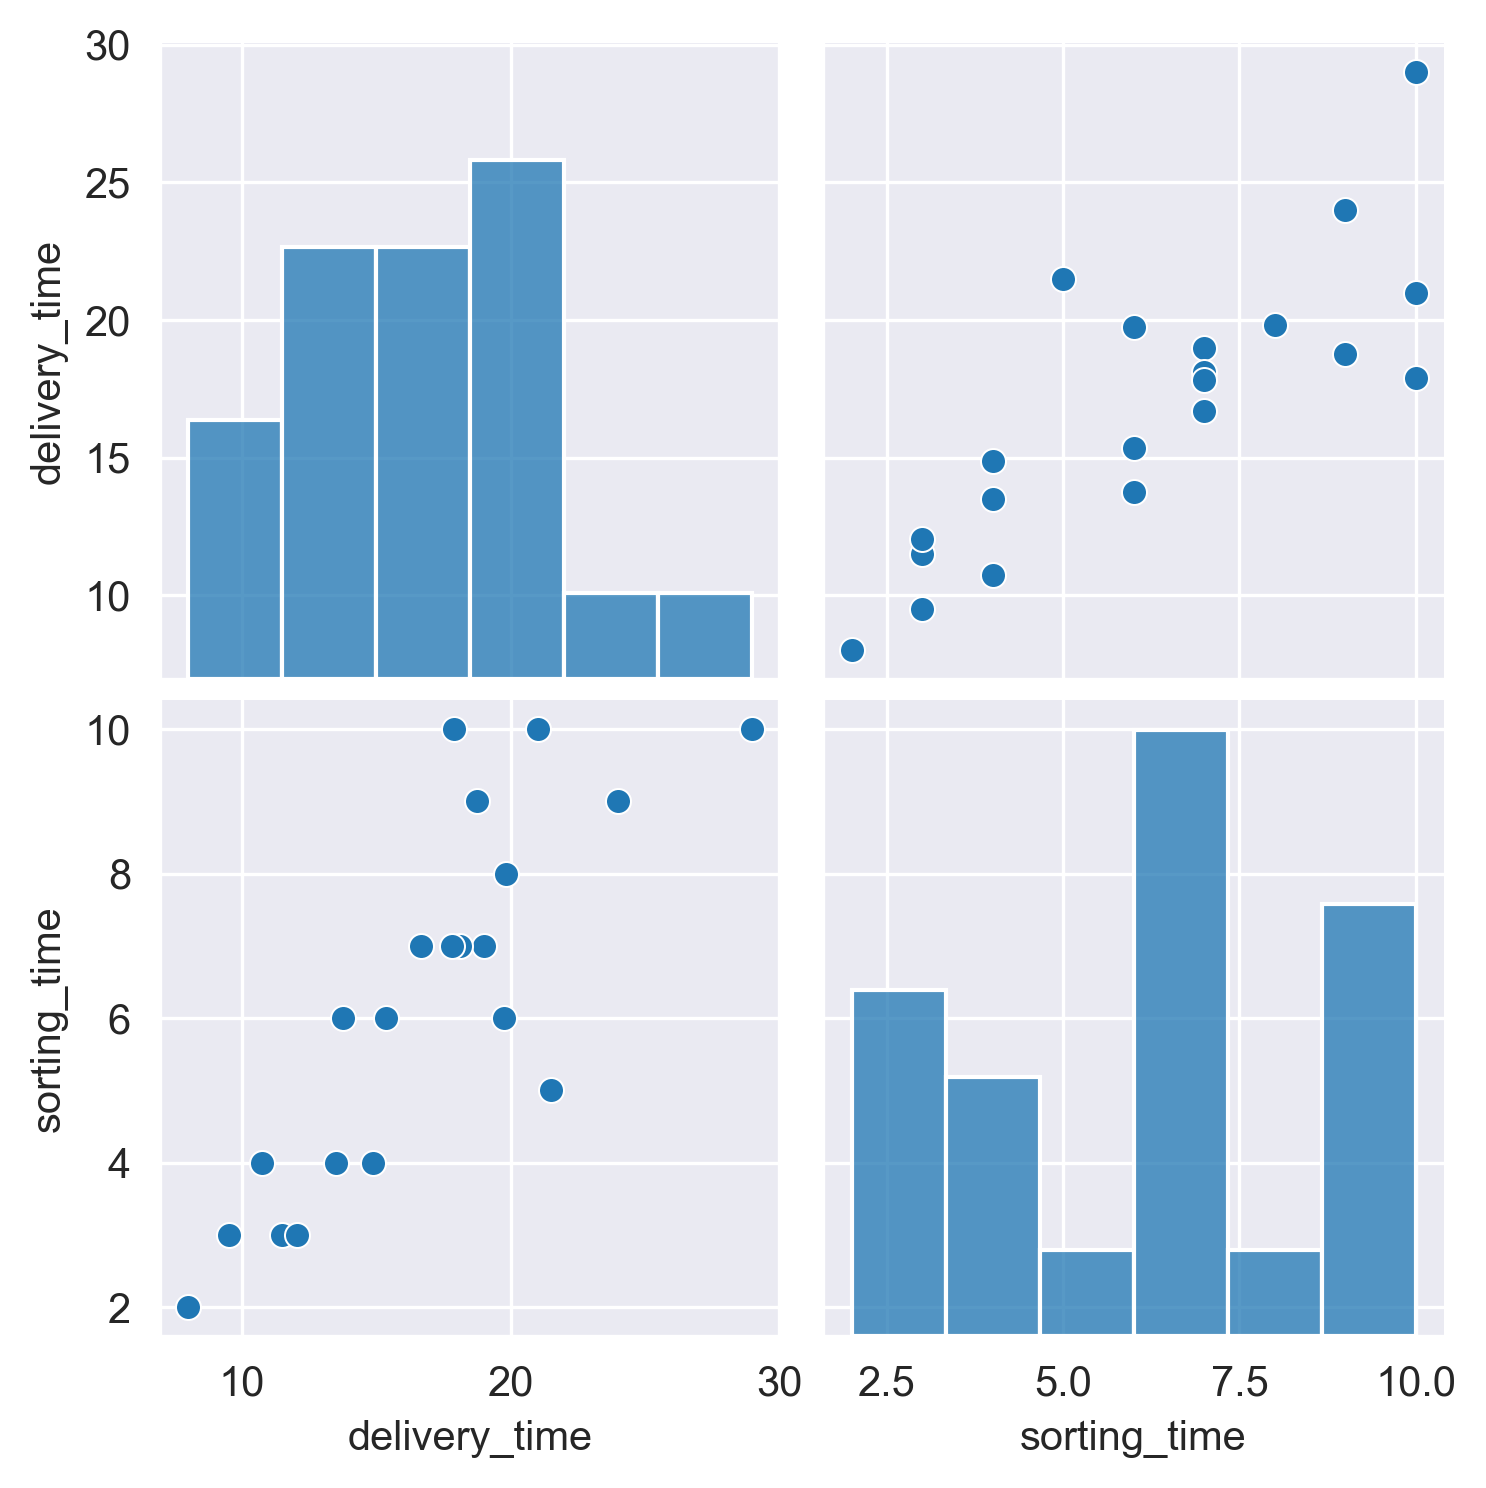

In [14]:
sns.pairplot(data)

# model building

In [15]:
model=smf.ols('sorting_time~delivery_time',data=data).fit()
model

In [16]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

# Example

In [17]:
delivery_time=9.8
y=0.4137*delivery_time+(-0.756673)
y

3.297587

  # p value and t value

In [18]:
model.pvalues

Intercept        0.512611
delivery_time    0.000004
dtype: float64

#  Prediction for new data

In [19]:
newdf=pd.DataFrame({
    'delivery_time':[7.8,9.9,12.31,15,20.9]
})
newdf

,delivery_time
0,7.80
1,9.90
2,12.31
3,15.00
4,20.90


In [20]:
model.predict(newdf)

0    2.470527
1    3.339389
2    4.336511
3    5.449481
4    7.890568
dtype: float64